My Octave Notebook 
============

Interact with Octave and the statistics-resampling package online in Jupyter Notebook with Binder. All commands are interpreted by Octave.  Since this is a [MetaKernel](https://github.com/Calysto/metakernel), a standard set of magics are available.  Help on commands is available using the `%help` magic or using `?` with a command. For the best experience, run this notebook in [Jupyter Lab](https://mybinder.org/v2/gh/acpennlab/statistics-resampling-online/master?labpath=statistics-resampling.ipynb). 

The code cells and their output below illustrate some examples of loading data and then performing analysis using functions from the **statistics-resampling** package. Follow the links in the **Quick start** section of the [README page](https://gnu-octave.github.io/statistics-resampling/readme.html), or on the [Function reference page](https://gnu-octave.github.io/statistics-resampling/function_reference), to find further examples. The example data files provided, **data1.tsv** and **data2.csv**, can be edited directly in this instance of JupyterLab. 

The statistics-resampling package already comes installed and loaded at **statistics-resampling-online**. Visit [GNU Octave Packages](https://gnu-octave.github.io/packages/) to see what other packages are available and how to install them. To load a newly installed package called `<package-name>`, use the command `pkg load <package-name>`. To preview demonstration number `X` of a function called `<function-name>`, use the command `demo ('<function-name>', X)`. To get more information about a particular function called `<function-name>`, use the command `help <function-name>`. Note that the **parallel** package cannot be installed at **statistics-resampling-online**, and that additions to the binder environment may be required to build or run some other Octave packages.

Some Octave packages come already installed and in this statistics-resampling-online Binder environment. If you were running Octave on your own machine, you would need to install and load the statistics-resampling package first by running the code in the following two cells:

In [ ]:
# Run this command once to install the package
pkg install -forge statistics-resampling

In [ ]:
# Run this command in each new Octave session
pkg load statistics-resampling

Run the code in the next code cell if you wish to know:
1) The version of GNU Octave that you are running
2) What packages (and their version) are already installed (and loaded*) here
3) More information about the statistics-resampling package

In [1]:
ver('Octave');
pkg list;
pkg describe -verbose statistics-resampling

----------------------------------------------------------------------
GNU Octave Version: 8.3.0 (hg id: 6fc591af58ba)
GNU Octave License: GNU General Public License
Operating System: Linux 5.15.0-94-generic #104-Ubuntu SMP Tue Jan 9 15:25:40 UTC 2024 x86_64
----------------------------------------------------------------------
Package Name           | Version | Installation directory
-----------------------+---------+-----------------------
                coder  |   1.9.1 | .../octave/api-v58/packages/coder-1.9.1
              control  |   4.0.0 | .../octave/api-v58/packages/control-4.0.0
       data-smoothing  |   1.3.0 | .../api-v58/packages/data-smoothing-1.3.0
            dataframe  |   1.2.0 | .../octave/api-v58/packages/dataframe-1.2.0
               fileio  |   1.2.2 | .../octave/api-v58/packages/fileio-1.2.2
                   ga  |  0.10.3 | .../share/octave/api-v58/packages/ga-0.10.3
                   io *|   2.6.4 | .../share/octave/api-v58/packages/io-2.6.4
        misce

**Example 1** (below): Bootstrap confidence intervals for the correlation coefficient using `bootci` on (bivariate) data (in wide format) loaded from **data1.tsv**. Application of `randtest2` for comparing the mean of paired samples is also illustrated.

In [2]:
# Load data from tab-separated-value (TSV) file (i.e. tab-delimited text file) with header
# Formatting: each %f corresponds to a number (double precision)
[before, after] = textread ('../data/data1.tsv', '%f %f', 'Delimiter', '', 'HeaderLines', 1);

# 95% BCa bootstrap confidence intervals for the correlation coefficient
ci = bootci (1999, @cor, before, after)

# Randomization test for comparing means of paired samples
pval = randtest2 (before, after, true, 10000, @(A, B) mean (A) - mean (B))

ci =

   0.5189
   0.8739

pval = 1.0000e-04


**Example 2** (below): Bootstrap two-way ANOVA (Type I) using `bootlm` with data (in long format) loaded from **data2.csv**.

ANOVA SUMMARY with effect of gender averaged over levels of degree
F(1,18) = 87.20, p = 0.0001 for the model: salary ~ 1 + degree
F(1,18) = 10.97, p = 0.00498 for the model: salary ~ 1 + degree + gender
F(1,18) = 0.42, p = 0.572 for the model: salary ~ 1 + degree + gender + degree:gender

MODEL FORMULA (based on Wilkinson's notation):

salary ~ 1 + degree + gender + degree:gender

MODEL COEFFICIENTS

name                                   coeff       CI_lower    CI_upper    p-val
--------------------------------------------------------------------------------
(Intercept)                            +20.00      +19.14      +20.92           
degree_1                               +7.000      +5.229      +8.822           
gender_1                               -3.000      -4.714      -1.094           
degree:gender_1                        +1.000      -1.623      +3.587           


MODEL FORMULA (based on Wilkinson's notation):

salary ~ 1 + degree + gender + degree:gender

MODEL ESTIMATE

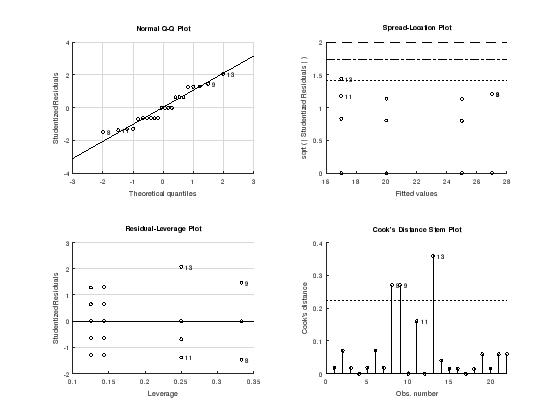

In [3]:
# Load data from comma-separated-value (CSV) file with header
# Formatting: each %d, %s and %f corresponds to an integer, a string and a
# number (double precision) respectively
[degree, gender, salary] = textread ('../data/data2.csv', '%d %s %f', 'Delimiter', ',', 'HeaderLines', 1);

# ANOVA using wild bootstrap
# https://gnu-octave.github.io/statistics-resampling/function/bootlm.html#7
[STATS, BOOTSTAT, AOVSTAT] = bootlm (salary, {degree, gender}, 'model', ...
                             'full', 'display', 'off', 'varnames', ...
                             {'degree', 'gender'}, 'seed', 1);

# Report ANOVA results
fprintf ('ANOVA SUMMARY with effect of gender averaged over levels of degree\n')
for i = 1:numel(AOVSTAT.MODEL)
  fprintf ('F(%u,%u) = %.2f, p = %.3g for the model: %s\n', ...
           AOVSTAT.DF(i), AOVSTAT.DFE, AOVSTAT.F(i), ...
           AOVSTAT.PVAL(i), AOVSTAT.MODEL{i});
end

# Calculate regression coefficients and 95% credible intervals (using bayesian bootstrap
# with an uninformative prior)
MDL = bootlm (salary, {degree, gender}, 'model', 'full', ...
                        'display', 'on', 'varnames', ...
                        {'degree', 'gender'}, 'method', 'bayesian', 'prior', 1);

# Calculate estimated marginal means and 95% credible intervals (using bayesian bootstrap
# with an uninformative prior)
EMMEANS = bootlm (salary, {degree, gender}, 'model', 'full', ...
                        'display', 'on', 'varnames', ...
                        {'degree', 'gender'}, 'dim', [1, 2], ...
                        'method', 'bayesian', 'prior', 'auto');

# Test whether salaries averaged over levels of college differ between men and 
# women (using wild bootstrap)
POSTTESTS = bootlm (salary, {degree, gender}, 'model', 'full', ...
                        'display', 'on', 'varnames', ...
                        {'degree', 'gender'}, 'dim', 2, ...
                        'posthoc', [1, 2]);

# Save the figure of the diagnostic plots
print ('../output/diagnostic_plots.svg','-dsvg')
#print ('../output/diagnostic_plots.png','-dpng','-r300')

**Example 3** (below): Bootstrap two-way ANOVA (Type I) using `bootlm` with data (in long format) as above but loaded from **data.xlsx**.

In [4]:
# Load data from Microsoft Excel or Open Office document spreadsheet
# First output is for numeric data, second output is for text data
# https://octave.sourceforge.io/io/function/xlsread.html
[degree, gender] = xlsread ('../data/data.xlsx', 'data2', 'A2:B23');
salary = xlsread ('../data/data.xlsx', 'data2', 'C2:C23');

# As above, ANOVA using wild bootstrap
[STATS, BOOTSTAT, AOVSTAT] = bootlm (salary, {degree, gender}, 'model', ...
                             'full', 'display', 'off', 'varnames', ...
                             {'degree', 'gender'}, 'seed', 1);

# Report ANOVA results
fprintf ('ANOVA SUMMARY with effect of gender averaged over levels of degree\n')
for i = 1:numel(AOVSTAT.MODEL)
  fprintf ('F(%u,%u) = %.2f, p = %.3g for the model: %s\n', ...
           AOVSTAT.DF(i), AOVSTAT.DFE, AOVSTAT.F(i), ...
           AOVSTAT.PVAL(i), AOVSTAT.MODEL{i});
end

ANOVA SUMMARY with effect of gender averaged over levels of degree
F(1,18) = 87.20, p = 0.0001 for the model: salary ~ 1 + degree
F(1,18) = 10.97, p = 0.00498 for the model: salary ~ 1 + degree + gender
F(1,18) = 0.42, p = 0.572 for the model: salary ~ 1 + degree + gender + degree:gender


**Example 4** (below): Bootstrap confidence intervals using `bootci` or `bootknife` with data specified in the code cell.

In [ ]:
# Spatial Test Data from Table 14.1 of Efron and Tibshirani (1993)
# An Introduction to the Bootstrap in Monographs on Statistics and Applied 
# Probability 57 (Springer)
# AIM:
# To construct 90% nonparametric bootstrap confidence intervals for var(A,1)
# var(A,1) = 171.5
# Exact intervals based on Normal theory are [118.4, 305.2]
A = [48 36 20 29 42 42 20 42 22 41 45 14 6 ...
    0 33 28 34 4 32 24 47 41 24 26 30 41].';
ci1 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','norm','seed',1);
ci2 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','per','seed',1);
ci3 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','basic','seed',1);
ci4 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','bca','seed',1);
ci5 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','stud','nbootstd',100,'seed',1);
ci6 = bootci (4999,{{@var,1},A},'alpha',0.1,'type','cal','nbootcal',499,'seed',1);

# Create table of confidence intervals using bootci
header = {'', 'norm', 'perc', 'basic', 'bca', 'stud', 'cal'};
tbl = table ({'CI_lower','CI_upper'}, ci1, ci2, ci3, ci4, ci5, ci6);
tbl = setVariableNames (tbl, (1:6), header);
prettyprint (tbl(:,:))

# Bias-corrected and accelerated bootstrap confidence intervals after balanced bootknife resampling 
bootknife (A,4999,{@var,1},[0.05,0.95]);

# Calibrated bootstrap confidence intervals after iterated balanced bootknife resampling 
bootknife (A,[4999,499],{@var,1},[0.05,0.95]);